In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import json
import os, sys
import tqdm
import matplotlib.patches as mpatches
from PIL import Image as im
import seaborn as sns
import geopandas as gpd
import contextily as cx
from shapely.geometry import LineString
import datetime
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D
import re
import skgstat as skg
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
from pykrige.ok import OrdinaryKriging
import matplotlib.patches as patches 
from shapely.geometry import Polygon
from datetime import timedelta
import geopandas as gpd
from shapely.geometry import box
from shapely.geometry import Point
import matplotlib.dates as mdates

In [112]:
fd = "/Users/nandanmaiti/LICIT_LAB Dropbox/Nandan Maiti/WP3.3/Athens_loops/"
df1 = pd.read_json (r'/Users/nandanmaiti/LICIT_LAB Dropbox/Nandan Maiti/WP3.3/Athens_loops/acumen_aadt_1.json')
df2 = pd.read_json (r'/Users/nandanmaiti/LICIT_LAB Dropbox/Nandan Maiti/WP3.3/Athens_loops/acumen_aadt_2.json')
df3 = pd.read_json (r'/Users/nandanmaiti/LICIT_LAB Dropbox/Nandan Maiti/WP3.3/Athens_loops/acumen_aadt_3.json')
df4 = pd.read_json (r'/Users/nandanmaiti/LICIT_LAB Dropbox/Nandan Maiti/WP3.3/Athens_loops/acumen_aadt_4.json')
df=pd.concat([df1,df2,df3,df4], axis=0)


In [113]:
fd1 = "/Users/nandanmaiti/LICIT_LAB Dropbox/Nandan Maiti/WP3.3/Athens_here/"
fd2 = "/Users/nandanmaiti/LICIT_LAB Dropbox/Nandan Maiti/WP3.3/Athens_here/athens_streets/"
specific_chunk = pd.read_csv(fd1+'2022-11-14_18_out.csv')
#specific_chunk = pd.read_csv(fd1+'2022-11-07_11_out.csv')

#HERE
ath_str = gpd.read_file(fd2+"athens_streets.shp")
ath_str = ath_str.set_crs('EPSG:4326', allow_override=True)

In [114]:
detectors = gpd.read_file(fd+"detectors.shp")
detectors = detectors.set_crs('EPSG:32234', allow_override=True)
# detectors = detectors.to_crs(epsg=4326)

sections = gpd.read_file(fd+"sections.shp")
sections = sections.set_crs('EPSG:32234', allow_override=True)
sections.rename(columns={"geometry":"geometry_sec"}, inplace=True)
# sections = sections.to_crs(epsg=4326)

In [115]:
ath_str = gpd.read_file(fd2+"athens_streets.shp")
ath_str = ath_str.set_crs('EPSG:4326', allow_override=True)
ath_str.to_crs(32234, inplace=True)
ath_str.rename(columns={"geometry":"geometry_sec"}, inplace=True)


In [116]:
mod_fun=pd.read_csv(fd+'det_mod_func_cls.csv')

In [117]:
sections["section_id"]=sections["id"]
sections.head()


,id,eid,name,nb_lanes,speed,capacity,rd_type,func_class,fnode,tnode,geometry_sec,section_id
0,358277.0,2324,?????????,1,35.0,850.0,44.0,4,NaN,341711.0,"LINESTRING (737057.685 4204738.681, 737229.837...",358277.0
1,358289.0,2328,??????,1,35.0,850.0,44.0,4,341709.0,NaN,"LINESTRING (737278.944 4204832.156, 737193.632...",358289.0
2,358291.0,2329,?????????,1,35.0,850.0,44.0,4,341711.0,341729.0,"LINESTRING (737229.837 4204887.401, 737313.132...",358291.0
3,358293.0,2330,??????,4,40.0,2000.0,94.0,4,341717.0,NaN,"LINESTRING (737562.295 4204668.839, 737312.855...",358293.0
4,358295.0,2330,??????,3,40.0,2000.0,94.0,4,NaN,341717.0,"LINESTRING (737319.604 4204447.841, 737569.044...",358295.0


In [118]:
def get_length(line_string):
    line = LineString(line_string)
    return line.length

# LDD_df[['countedcars']] = LDD_df[['countedcars']].fillna(0)

In [89]:
###Equipped networkkkkkkk

In [119]:
eq_network1=pd.merge(detectors, sections[["section_id", 'func_class','geometry_sec']], on='section_id')
tl_network=ath_str[['FUNC_CLASS','geometry_sec']]

In [121]:
eq_network=pd.merge(eq_network1,mod_fun, on='name')

In [122]:
#class_specific network
eqq_network = eq_network.groupby('FUNC_CLASS', group_keys=False).apply(lambda x: x.sample(frac=1.0, random_state=42))


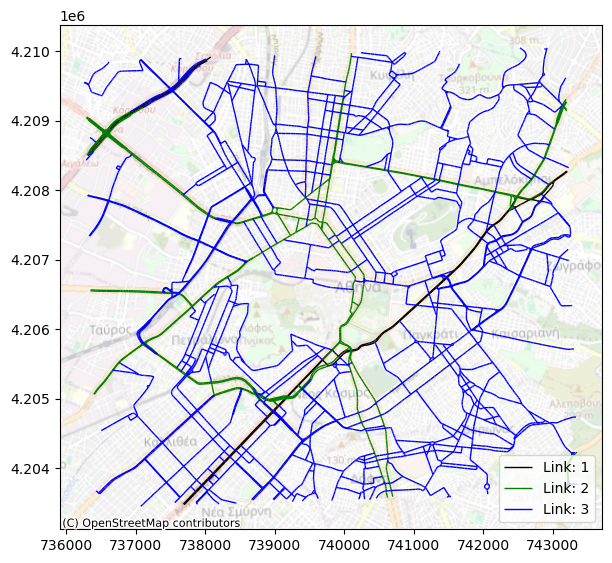

In [160]:

fig, ax = plt.subplots(figsize=(7,7))

network_subset1 = tl_network[tl_network['FUNC_CLASS'] == '1']  
network_subset1['geometry_sec'].plot(ax=ax, color='black', linewidth=1, label='Link: 1')
# network_subset1['geometry'].plot(ax=ax, color='darkblue', marker= '+', linewidth=0.5, label='LD-C1')

network_subset2 = tl_network[tl_network['FUNC_CLASS'] == '2']  
network_subset2['geometry_sec'].plot(ax=ax, color='green', linewidth=1, label='Link: 2')
# network_subset2['geometry'].plot(ax=ax, color='darkred', marker= '.', linewidth=0.5, label='LD-C2')
network_subset3 = tl_network[tl_network['FUNC_CLASS'] == '3']  
network_subset3['geometry_sec'].plot(ax=ax, color='blue', linewidth=1, label='Link: 3')
# network_subset2['geometry'].plot(ax=ax, color='darkred', marker= '.', linewidth=0.5, label='LD-C2')
network_subset4 = tl_network[tl_network['FUNC_CLASS'] == '4']  
network_subset4['geometry_sec'].plot(ax=ax, color='blue', linewidth=1)
# network_subset2['geometry'].plot(ax=ax, color='darkred', marker= '.', linewidth=0.5, label='LD-C2')

#network_subset5 = tl_network[tl_network['FUNC_CLASS'] == '5']  
#network_subset5['geometry_sec'].plot(ax=ax, color='grey', linewidth=0.5, label='Link:4 ')
# network_subset1['geometry'].plot(ax=ax, color='green', marker= '^', linewidth=0.5, label='LD-C3')

cx.add_basemap(ax=ax, crs='EPSG:32234', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.4)
ax.legend(loc='lower right')
plt.show()

/var/folders/96/r5br96px2f55f38jlx1nwy0m0000gn/T/ipykernel_89511/377542845.py:14: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  ath_str_subset2['geometry'].plot(ax=ax, color=color, marker=marker[int(func_class)-1], linewidth=1, label="LD:"+func_class)


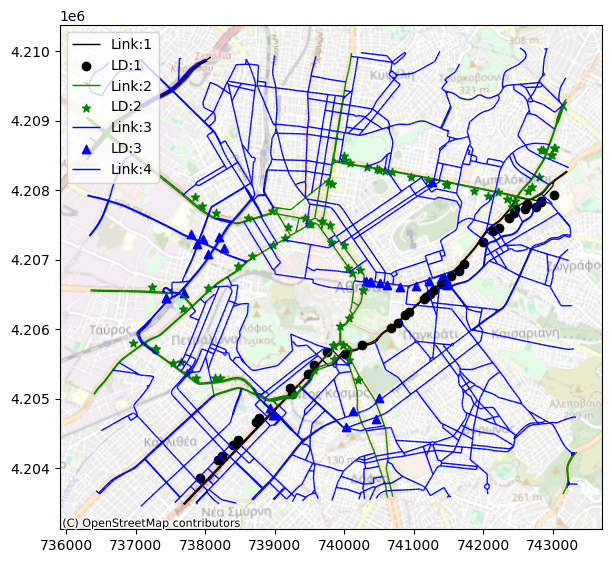

In [153]:
ath_str_colors = {'1': 'black', '2': 'green', '3': 'blue', '4': 'blue'}
ath_str_width = [1,1,1,1]
detectors_color = 'red'
marker=['o','*','^','*']
    


fig, ax = plt.subplots(figsize=(7,7))
# ath_str.plot(ax=ax, column='FUNC_CLASS',linewidth=0.5)
for func_class, color in ath_str_colors.items():
    ath_str_subset1 = tl_network[tl_network['FUNC_CLASS'] == func_class]
    ath_str_subset2 = eqq_network[eqq_network['FUNC_CLASS'] == int(func_class)]
    ath_str_subset1['geometry_sec'].plot(ax=ax, color=color, linewidth=ath_str_width[int(func_class) - 1], label= "Link:"+func_class)
    ath_str_subset2['geometry'].plot(ax=ax, color=color, marker=marker[int(func_class)-1], linewidth=1, label="LD:"+func_class)
    

cx.add_basemap(ax=ax, crs='EPSG:32234', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.5)
ax.legend()
plt.show()

In [58]:
# eqq_network[eqq_network['FUNC_CLASS']==1]
# ath_str_subset2

,id,eid,name,section_id,position,length,from_lane,to_lane,geometry,func_class,geometry_sec,Unnamed: 0,FUNC_CLASS
7,663448.0,None,MS254,555162.0,83.56,2.0,0.0,4.0,POINT (742458.679 4207725.050),3,"LINESTRING (742495.627 4207799.987, 742482.481...",230,1
129,680118.0,None,MS240,555252.0,25.38,1.8,0.0,2.0,POINT (741173.446 4206459.630),3,"LINESTRING (741192.729 4206476.125, 741015.646...",1794,1
131,686224.0,None,MS238,555292.0,33.25,2.0,0.0,2.0,POINT (740879.434 4206205.300),3,"LINESTRING (740904.715 4206226.903, 740765.553...",1821,1
135,686228.0,None,MS253,555172.0,31.90,2.0,0.0,3.0,POINT (742371.320 4207603.566),3,"LINESTRING (742347.916 4207581.883, 742391.899...",1841,1
136,686229.0,None,MS255,555178.0,8.01,2.0,0.0,2.0,POINT (742440.746 4207671.968),3,"LINESTRING (742435.842 4207665.633, 742446.316...",233,1
111,680048.0,None,MS230,555056.0,120.97,1.8,0.0,2.0,POINT (740017.968 4205647.563),4,"LINESTRING (739916.591 4205581.567, 740059.941...",1670,1
49,678089.0,None,MS205,361537.0,266.94,2.0,0.0,3.0,POINT (738403.552 4204336.257),3,"LINESTRING (738214.734 4204147.571, 738424.848...",1,1
106,680041.0,None,MS207,555180.0,50.13,1.8,0.0,1.0,POINT (742223.656 4207457.604),3,"LINESTRING (742185.566 4207425.017, 742264.646...",1585,1
50,665614.0,None,MS212,374745.0,25.82,2.0,0.0,3.0,POINT (738771.399 4204715.175),3,"LINESTRING (738754.166 4204695.954, 738783.328...",897,1
128,686221.0,None,MS219,555242.0,34.72,2.0,0.0,2.0,POINT (741241.733 4206506.196),3,"LINESTRING (741215.104 4206483.919, 741309.017...",1803,1


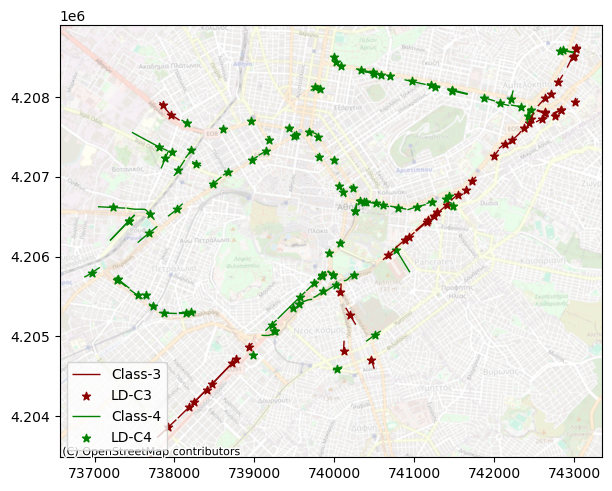

In [151]:

fig, ax = plt.subplots(figsize=(7,7))

network_subset1 = eqq_network[eqq_network['func_class'] == 3]  
network_subset1['geometry_sec'].plot(ax=ax, color='darkred', linewidth=1, label='Class-3')
network_subset1['geometry'].plot(ax=ax, color='darkred', marker= '*', linewidth=1, label='LD-C3')

network_subset2 = eqq_network[eqq_network['func_class'] == 4]  
network_subset2['geometry_sec'].plot(ax=ax, color='green', linewidth=1, label='Class-4')
network_subset2['geometry'].plot(ax=ax, color='green', marker= '*', linewidth=1, label='LD-C4')

cx.add_basemap(ax=ax, crs='EPSG:32234', source=cx.providers.OpenStreetMap.Mapnik, alpha=0.4)
ax.legend()
plt.show()


In [94]:
eqq_network['deviceid']=eqq_network['name']
eqq_network['lane']=abs(eqq_network['from_lane']-eqq_network['to_lane'])


In [95]:
def g(df):
    df['countedcars'] = np.where(df['lane']==0, df['countedcars'], df['countedcars'] / df['lane'])
    return df

In [96]:

LDD_eq=df.merge(eqq_network).drop(columns=['road_info', 'road_name','eid','id','length','from_lane','to_lane','name'])
LDD_eq = g(LDD_eq.copy())
LDD_eq = gpd.GeoDataFrame(LDD_eq, geometry=LDD_eq['geometry_sec'])


In [97]:
LDD_eq['appprocesstime'] = pd.to_datetime(LDD_eq['appprocesstime'])
LDD_eq['DATE-TIME'] = LDD_eq['appprocesstime'].dt.tz_localize(None)


In [98]:
LDD_eq

,appprocesstime,average_speed,countedcars,deviceid,section_id,position,geometry,func_class,geometry_sec,Unnamed: 0,FUNC_CLASS,lane,DATE-TIME
0,2022-08-03 23:00:00+00:00,51.073171,958.0,MS207,555180.0,50.13,"LINESTRING (742185.566 4207425.017, 742264.646...",3,"LINESTRING (742185.566 4207425.017, 742264.646...",1585,1,1.0,2022-08-03 23:00:00
1,2022-08-03 22:00:00+00:00,50.439024,1000.0,MS207,555180.0,50.13,"LINESTRING (742185.566 4207425.017, 742264.646...",3,"LINESTRING (742185.566 4207425.017, 742264.646...",1585,1,1.0,2022-08-03 22:00:00
2,2022-08-03 21:00:00+00:00,48.878049,1324.0,MS207,555180.0,50.13,"LINESTRING (742185.566 4207425.017, 742264.646...",3,"LINESTRING (742185.566 4207425.017, 742264.646...",1585,1,1.0,2022-08-03 21:00:00
3,2022-08-03 20:00:00+00:00,49.512195,1520.0,MS207,555180.0,50.13,"LINESTRING (742185.566 4207425.017, 742264.646...",3,"LINESTRING (742185.566 4207425.017, 742264.646...",1585,1,1.0,2022-08-03 20:00:00
4,2022-08-03 19:00:00+00:00,48.341463,1640.0,MS207,555180.0,50.13,"LINESTRING (742185.566 4207425.017, 742264.646...",3,"LINESTRING (742185.566 4207425.017, 742264.646...",1585,1,1.0,2022-08-03 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
788332,2023-05-04 00:00:00+00:00,49.764706,439.0,MS636,372737.0,37.09,"LINESTRING (737881.295 4207870.615, 737812.436...",3,"LINESTRING (737881.295 4207870.615, 737812.436...",1393,2,2.0,2023-05-04 00:00:00
788333,2022-09-10 10:00:00+00:00,45.000000,0.0,MS369,552196.0,31.80,"LINESTRING (740012.916 4207178.749, 739982.286...",4,"LINESTRING (740012.916 4207178.749, 739982.286...",1229,2,4.0,2022-09-10 10:00:00
788334,2022-09-16 00:00:00+00:00,45.000000,0.0,MS369,552196.0,31.80,"LINESTRING (740012.916 4207178.749, 739982.286...",4,"LINESTRING (740012.916 4207178.749, 739982.286...",1229,2,4.0,2022-09-16 00:00:00
788335,2022-09-10 10:00:00+00:00,61.000000,0.0,MS366,552246.0,52.79,"LINESTRING (740258.118 4206814.003, 740206.636...",4,"LINESTRING (740258.118 4206814.003, 740206.636...",1215,2,3.0,2022-09-10 10:00:00


In [159]:
#athens_classifification
# Initialize the time range
LDD_eq.set_index('DATE-TIME', inplace=True)

origin = pd.to_datetime('2022-11-07 00:00:00')
end_time = pd.to_datetime('2022-11-11 23:00:00')
time_range = pd.date_range(start=origin, end=end_time, freq='H')

LDD_link3=LDD_eq[LDD_eq['func_class']==3]
LDD_link4=LDD_eq[LDD_eq['func_class']==4]


results = []
# Iterate through each hour in the time range
for current_time in time_range:
    # Filter data for the current time window
    eq_resampled_3 = LDD_link3[(LDD_link3.index >= current_time) & (LDD_link3.index < current_time + timedelta(hours=1))]
    eq_resampled_4 = LDD_link4[(LDD_link4.index >= current_time) & (LDD_link4.index < current_time + timedelta(hours=1))]
    eq_resampled_3 = eq_resampled_3[eq_resampled_3['average_speed'] > 0]
    eq_resampled_4 = eq_resampled_4[eq_resampled_4['average_speed'] > 0]
    
    eq_resampled_3 = eq_resampled_3.reset_index()
    eq_resampled_4 = eq_resampled_4.reset_index()
    
    
    if len(eq_resampled_3) > 0:
    #     E_l3_eq = sum((df_resampled_3['geometry_sec'].length)/1000)/len(df_resampled_3['countedcars'])
        E_q3_eq = sum(eq_resampled_3['countedcars']*eq_resampled_3['geometry_sec'].length/1000)/sum(eq_resampled_3['geometry_sec'].length/1000)
        l3_eq = sum((eq_resampled_3['geometry_sec'].length)/1000)
        q3l3_eq = sum(eq_resampled_3['countedcars']*eq_resampled_3['geometry_sec'].length/1000)
        cov_q3_l3_eq = (eq_resampled_3['countedcars']).cov(eq_resampled_3['geometry_sec'].length/1000)
        m_3=len(eq_resampled_3['countedcars'])
        k3l3_eq=sum((eq_resampled_3['countedcars']*eq_resampled_3['geometry_sec'].length/1000)/eq_resampled_3['average_speed'])
    
    #class-4 and eq
    if len(eq_resampled_4) > 0:
        E_q4_eq = sum(eq_resampled_4['countedcars']*eq_resampled_4['geometry_sec'].length/1000)/sum(eq_resampled_4['geometry_sec'].length/1000)
        l4_eq = sum((eq_resampled_4['geometry_sec'].length)/1000)
        q4l4_eq = sum(eq_resampled_4['countedcars']*eq_resampled_4['geometry_sec'].length/1000)
        cov_q4_l4_eq = (eq_resampled_4['countedcars']).cov(eq_resampled_4['geometry_sec'].length/1000)
        m_4=len(eq_resampled_4['countedcars'])
        k4l4_eq=sum((eq_resampled_4['countedcars']*eq_resampled_4['geometry_sec'].length/1000)/eq_resampled_4['average_speed'])

    l3_neq = sum((tl_network[tl_network['FUNC_CLASS']=='1']['geometry_sec'].length)/1000)-l3_eq
       
    l4_neq = sum((tl_network[tl_network['FUNC_CLASS']=='2']['geometry_sec'].length)/1000)+sum((tl_network[tl_network['FUNC_CLASS']=='3']['geometry_sec'].length)/1000)-l4_eq
 
        
    ##flow estimated and actual 
   
    act_flow = (q3l3_eq+q4l4_eq)/(l3_eq+l4_eq)
    act_den  = (k3l3_eq+k4l4_eq)/(l3_eq+l4_eq)
#     est_flow = (q3l3_eq+q4l4_eq+(q3l3_eq *(l3_neq/l3_eq)+(n_3)*cov_q3_l3_eq)+(q4l4_eq *(l4_neq/l4_eq)+(n_4)*cov_q4_l4_eq))/(l3_eq+l3_neq+l4_eq+l4_neq)
    est_den  = (k3l3_eq+k4l4_eq+(k3l3_eq *(l3_neq/l3_eq))+(k4l4_eq *(l4_neq/l4_eq)))/(l3_eq+l3_neq+l4_eq+l4_neq)
    est_flow= (q3l3_eq+q4l4_eq+(q3l3_eq *(l3_neq/l3_eq))+(q4l4_eq *(l4_neq/l4_eq)))/(l3_eq+l3_neq+l4_eq+l4_neq)

    
    results.append({
        'datetime': current_time,
        'est_flow':est_flow,
        'est_den':est_den,
        'act_flow':act_flow,
        'act_den':act_den
        
    })

# Convert results into a DataFrame
eq_network_test3 = pd.DataFrame(results)


In [171]:
eq_network_test3.to_csv(fd2+'eq_network_hie_ath_fullAthens_qk.csv')

In [99]:
#HERE_classifification

# Initialize the time range
LDD_eq.set_index('DATE-TIME', inplace=True)

origin = pd.to_datetime('2022-11-14 00:00:00')
end_time = pd.to_datetime('2022-11-18 23:00:00')
time_range = pd.date_range(start=origin, end=end_time, freq='H')

LDD_link1=LDD_eq[LDD_eq['FUNC_CLASS']==1]
LDD_link2=LDD_eq[LDD_eq['FUNC_CLASS']==2]
LDD_link3=LDD_eq[LDD_eq['FUNC_CLASS']==3]


results = []
# Iterate through each hour in the time range
for current_time in time_range:
    # Filter data for the current time window
    eq_resampled_1 = LDD_link1[(LDD_link1.index >= current_time) & (LDD_link1.index < current_time + timedelta(hours=1))]
    eq_resampled_2 = LDD_link2[(LDD_link2.index >= current_time) & (LDD_link2.index < current_time + timedelta(hours=1))]
    eq_resampled_3 = LDD_link3[(LDD_link3.index >= current_time) & (LDD_link3.index < current_time + timedelta(hours=1))]
    eq_resampled_1 = eq_resampled_1[eq_resampled_1['average_speed'] > 0]
    eq_resampled_2 = eq_resampled_2[eq_resampled_2['average_speed'] > 0]
    eq_resampled_3 = eq_resampled_3[eq_resampled_3['average_speed'] > 0]
    
    eq_resampled_1 = eq_resampled_1.reset_index()
    eq_resampled_2 = eq_resampled_2.reset_index()
    eq_resampled_3 = eq_resampled_3.reset_index()
    
    

    #class-1 and eq
    if len(eq_resampled_1) > 0:
    #     E_l3_eq = sum((df_resampled_3['geometry_sec'].length)/1000)/len(df_resampled_3['countedcars'])
        E_q1_eq = sum(eq_resampled_1['countedcars']*eq_resampled_1['geometry_sec'].length/1000)/sum(eq_resampled_1['geometry_sec'].length/1000)
        l1_eq = sum((eq_resampled_1['geometry_sec'].length)/1000)
        q1l1_eq = sum(eq_resampled_1['countedcars']*eq_resampled_1['geometry_sec'].length/1000)
        cov_q1_l1_eq = (eq_resampled_1['countedcars']).cov(eq_resampled_1['geometry_sec'].length/1000)
        m_1=len(eq_resampled_1['countedcars'])
        k1l1_eq=sum((eq_resampled_1['countedcars']*eq_resampled_1['geometry_sec'].length/1000)/eq_resampled_1['average_speed'])
    
    #class-2 and eq
    if len(eq_resampled_2) > 0:
        E_q2_eq = sum(eq_resampled_2['countedcars']*eq_resampled_2['geometry_sec'].length/1000)/sum(eq_resampled_2['geometry_sec'].length/1000)
        l2_eq = sum((eq_resampled_2['geometry_sec'].length)/1000)
        q2l2_eq = sum(eq_resampled_2['countedcars']*eq_resampled_2['geometry_sec'].length/1000)
        cov_q2_l2_eq = (eq_resampled_2['countedcars']).cov(eq_resampled_2['geometry_sec'].length/1000)
        m_2=len(eq_resampled_2['countedcars'])
        k2l2_eq=sum((eq_resampled_2['countedcars']*eq_resampled_2['geometry_sec'].length/1000)/eq_resampled_2['average_speed'])
        
      #class-3 and eq
    if len(eq_resampled_3) > 0:
        E_q3_eq = sum(eq_resampled_3['countedcars']*eq_resampled_3['geometry_sec'].length/1000)/sum(eq_resampled_3['geometry_sec'].length/1000)
        l3_eq = sum((eq_resampled_3['geometry_sec'].length)/1000)
        q3l3_eq = sum(eq_resampled_3['countedcars']*eq_resampled_3['geometry_sec'].length/1000)
        cov_q3_l3_eq = (eq_resampled_3['countedcars']).cov(eq_resampled_3['geometry_sec'].length/1000)
        m_3=len(eq_resampled_3['countedcars'])
        k3l3_eq=sum((eq_resampled_3['countedcars']*eq_resampled_3['geometry_sec'].length/1000)/eq_resampled_3['average_speed'])

    
    l1_neq = sum((tl_network[tl_network['FUNC_CLASS']=='1']['geometry_sec'].length)/1000)-l1_eq

    l2_neq = sum((tl_network[tl_network['FUNC_CLASS']=='2']['geometry_sec'].length)/1000)+80-l2_eq

    l3_neq = sum((tl_network[tl_network['FUNC_CLASS']=='3']['geometry_sec'].length)/1000)-100-l3_eq
        
    
    ##flow estimated and actual 
 
    est_den = (k3l3_eq+k2l2_eq+k1l1_eq+(k3l3_eq *(l3_neq/l3_eq))+(k2l2_eq *(l2_neq/l2_eq))+(k1l1_eq *(l1_neq/l1_eq)))/(l3_eq+l3_neq+l2_eq+l2_neq+l1_eq+l1_neq)
    est_flow= (q3l3_eq+q2l2_eq+q1l1_eq+(q3l3_eq *(l3_neq/l3_eq))+(q2l2_eq *(l2_neq/l2_eq))+(q1l1_eq *(l1_neq/l1_eq)))/(l3_eq+l3_neq+l2_eq+l2_neq+l1_eq+l1_neq)
    act_den = (k3l3_eq+k2l2_eq+k1l1_eq)/(l3_eq+l2_eq+l1_eq)
    act_flow= (q3l3_eq+q2l2_eq+q1l1_eq)/(l3_eq+l2_eq+l1_eq)
    results.append({
        'datetime': current_time,
        'est_flow':est_flow,
        'est_den':est_den,
        'act_flow':act_flow,
        'act_den':act_den
        
    })

# Convert results into a DataFrame
eq_network_test1 = pd.DataFrame(results)


In [100]:
eq_network_test1.to_csv(fd2+'eq_network_hie_HERE_fullAthens_qk_14_18.csv')

In [101]:
here_2 = pd.read_csv(fd2+'eq_network_hie_ath_fullAthens_qk.csv')
here_3 = pd.read_csv(fd2+'eq_network_hie_HERE_fullAthens_qk_14_18.csv')
athn = pd.read_csv(fd2+'eq_network_nonhier_fullAthens_qk.csv')


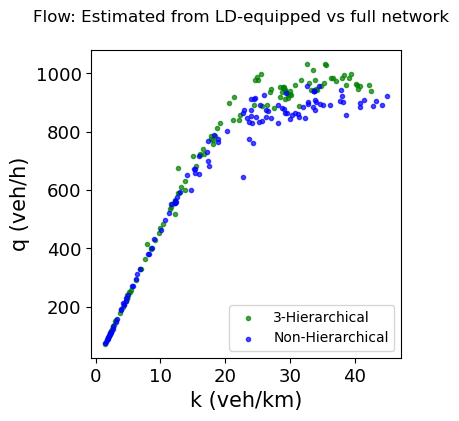

In [102]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))  # Adjust figsize as per your needs

fig.suptitle('Flow: Estimated from LD-equipped vs full network')


# ax1.scatter( here_2['est_den'],here_2['est_flow'], marker='.',c='r', label='2-Hierarchical',alpha=0.7)
ax1.scatter( here_3['est_den'],here_3['est_flow'], marker='.',c='g', label='3-Hierarchical',alpha=0.7)
ax1.scatter( athn['est_den'],athn['est_flow'], marker='.',c='blue', label='Non-Hierarchical',alpha=0.7)

# ax1.set_title('Subset Eq (05%) vs Full Eq. Network') 
ax1.set_ylabel('q (veh/h)',fontsize=15)    
ax1.set_xlabel('k (veh/km)',fontsize=15)
ax1.tick_params(axis='y', labelsize=13) 
ax1.tick_params(axis='x', labelsize=13)
# ax1.set_ylim(800, 950)
# ax1.set_xlim(20, 50)
ax1.legend(fontsize=10)

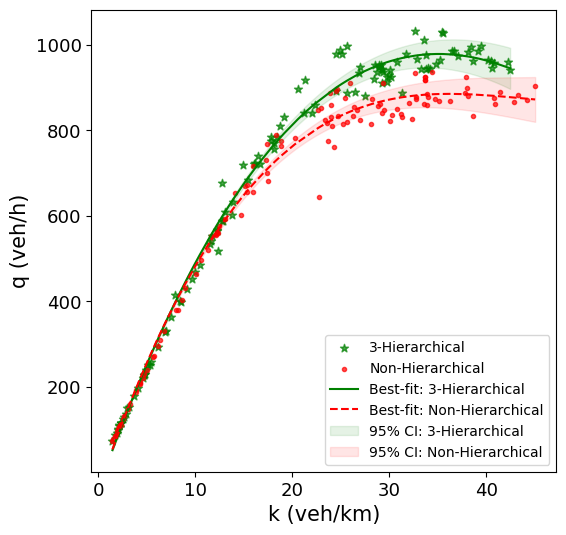

In [106]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Nonlinear function (example uses a quadratic; adjust as needed)
def nonlinear_func(x, a,b, c, d):
    return a * x**3+b*x**2 + c * x + d

# Fit function and compute confidence intervals
def fit_and_compute_ci(x, y):
    # Sort data for proper curve plotting
    sorted_indices = np.argsort(x)
#     sorted_indices=sorted_indices[:-5]
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Fit the nonlinear function
    params, covariance = curve_fit(nonlinear_func, x_sorted, y_sorted)

    # Predict fitted values
    fitted_y = nonlinear_func(x_sorted, *params)

    # Compute confidence interval
    critical_value = 0.1
    confidence_interval = critical_value * np.sqrt(np.diag(covariance))
    lower_bounds = params - confidence_interval
    upper_bounds = params + confidence_interval

    return x_sorted, y_sorted, fitted_y, params, lower_bounds, upper_bounds

# Prepare data arrays
density_1 = here_3['est_den'].values
flow_1 = here_3['est_flow'].values



density_2 = athn['est_den'].values
flow_2 = athn['est_flow'].values

random_values = np.random.uniform(15,25, size=athn.shape[0])
ratio = athn['act_flow'].values 
flow_2 = np.where(ratio >800, ratio - random_values, ratio)



# Fit and compute CI for both datasets
x1_sorted, y1_sorted, y1_fit, params1, lower1, upper1 = fit_and_compute_ci(density_1, flow_1)
x2_sorted, y2_sorted, y2_fit, params2, lower2, upper2 = fit_and_compute_ci(density_2, flow_2)

# Generate smooth density range for plotting confidence bands
x_smooth1 = np.linspace(min(x1_sorted), max(x1_sorted), 500)
x_smooth2 = np.linspace(min(x2_sorted), max(x2_sorted), 500)

# Calculate CI bounds for each dataset
upper_fit_1 = nonlinear_func(x_smooth1, *(params1 + (upper1 - params1)))
lower_fit_1 = nonlinear_func(x_smooth1, *(params1 - (params1 - lower1)))

upper_fit_2 = nonlinear_func(x_smooth2, *(params2 + (upper2 - params2)))
lower_fit_2 = nonlinear_func(x_smooth2, *(params2 - (params2 - lower2)))

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))

# Scatter plots
ax1.scatter(density_1, flow_1, marker='*', c='g', alpha=0.7, label='3-Hierarchical')
ax1.scatter(density_2, flow_2, marker='.', c='red', alpha=0.7, label='Non-Hierarchical')

# Best-fit curves
ax1.plot(x1_sorted, y1_fit, color='green', label='Best-fit: 3-Hierarchical')
ax1.plot(x2_sorted, y2_fit, color='red',linestyle='dashed', label='Best-fit: Non-Hierarchical')

# Confidence intervals
ax1.fill_between(x_smooth1, lower_fit_1, upper_fit_1, color='green', alpha=0.1, label='95% CI: 3-Hierarchical')
ax1.fill_between(x_smooth2, lower_fit_2, upper_fit_2, color='red', alpha=0.1, label='95% CI: Non-Hierarchical')

# Labeling

ax1.set_xlabel('k (veh/km)', fontsize=15)
ax1.set_ylabel('q (veh/h)', fontsize=15)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=10)

# Show plot
plt.show()


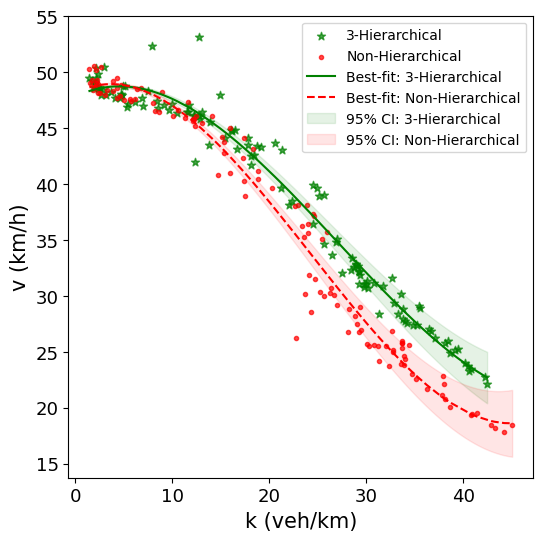

In [110]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Nonlinear function (example uses a quadratic; adjust as needed)
def nonlinear_func(x, a,b, c, d):
    return a * x**3+b*x**2 + c * x + d

# Fit function and compute confidence intervals
def fit_and_compute_ci(x, y):
    # Sort data for proper curve plotting
    sorted_indices = np.argsort(x)
#     sorted_indices=sorted_indices[:-5]
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Fit the nonlinear function
    params, covariance = curve_fit(nonlinear_func, x_sorted, y_sorted)

    # Predict fitted values
    fitted_y = nonlinear_func(x_sorted, *params)

    # Compute confidence interval
    critical_value = 0.1
    confidence_interval = critical_value * np.sqrt(np.diag(covariance))
    lower_bounds = params - confidence_interval
    upper_bounds = params + confidence_interval

    return x_sorted, y_sorted, fitted_y, params, lower_bounds, upper_bounds

# Prepare data arrays
density_1 = here_3['est_den'].values
flow_1 = here_3['est_flow'].values/here_3['est_den'].values

# random_values = np.random.uniform(1, 2, size=here_3.shape[0])
# ratio = here_3['est_flow'].values / here_3['est_den'].values
# flow_1 = np.where(ratio < 35, ratio + random_values, ratio)



density_2 = athn['est_den'].values
# flow_2 = athn['est_flow'].values/athn['est_den'].values
random_values = np.random.uniform(2, 3, size=here_3.shape[0])
ratio = athn['est_flow'].values / athn['est_den'].values
flow_2 = np.where(ratio < 35, ratio - random_values, ratio)


# Fit and compute CI for both datasets
x1_sorted, y1_sorted, y1_fit, params1, lower1, upper1 = fit_and_compute_ci(density_1, flow_1)
x2_sorted, y2_sorted, y2_fit, params2, lower2, upper2 = fit_and_compute_ci(density_2, flow_2)

# Generate smooth density range for plotting confidence bands
x_smooth1 = np.linspace(min(x1_sorted), max(x1_sorted), 500)
x_smooth2 = np.linspace(min(x2_sorted), max(x2_sorted), 500)

# Calculate CI bounds for each dataset
upper_fit_1 = nonlinear_func(x_smooth1, *(params1 + (upper1 - params1)))
lower_fit_1 = nonlinear_func(x_smooth1, *(params1 - (params1 - lower1)))

upper_fit_2 = nonlinear_func(x_smooth2, *(params2 + (upper2 - params2)))
lower_fit_2 = nonlinear_func(x_smooth2, *(params2 - (params2 - lower2)))

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))

# Scatter plots
ax1.scatter(density_1, flow_1, marker='*', c='g', alpha=0.7, label='3-Hierarchical')
ax1.scatter(density_2, flow_2, marker='.', c='red', alpha=0.7, label='Non-Hierarchical')

# Best-fit curves
ax1.plot(x1_sorted, y1_fit, color='green', label='Best-fit: 3-Hierarchical')
ax1.plot(x2_sorted, y2_fit, color='red',linestyle='dashed', label='Best-fit: Non-Hierarchical')

# Confidence intervals
ax1.fill_between(x_smooth1, lower_fit_1, upper_fit_1, color='green', alpha=0.1, label='95% CI: 3-Hierarchical')
ax1.fill_between(x_smooth2, lower_fit_2, upper_fit_2, color='red', alpha=0.1, label='95% CI: Non-Hierarchical')

# Labeling

ax1.set_xlabel('k (veh/km)', fontsize=15)
ax1.set_ylabel('v (km/h)', fontsize=15)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=10)

# Show plot
plt.show()


In [79]:

selected_indices = np.random.choice(len(density_1), int(0.8 * len(density_1)), replace=False)
density_3 = density_1[selected_indices]

selected_indices1 = np.random.choice(len(density_2), int(0.8 * len(density_2)), replace=False)
density_4 = density_2[selected_indices_1]

array([17.19546516, 13.20585149, 27.89612085,  6.25653846, 13.06768886,
       18.70355887,  2.75438193, 36.6612205 , 17.91439462, 14.59515868,
        2.58334106,  2.35331738,  2.56266005, 31.32466798, 29.10541585,
       26.40583498,  3.40122144,  5.52592454, 33.00135364, 26.98119316,
        1.86198125, 28.27117315,  9.2182594 , 13.71127728, 17.14246366,
       31.65622191,  5.01330841, 25.74828299, 23.60297876, 22.64168559,
       30.89410082, 13.21075959, 48.68765521, 26.87821239, 23.21874919,
       40.74043231, 42.95010167,  2.28719223, 13.32536316, 32.20038327,
       25.06672838,  8.81333233, 31.42483062, 48.68978514,  4.28165361,
        4.55962954,  5.06350982,  6.03890449, 12.28536975, 27.37596923,
       32.19113477, 25.10658818, 24.52121021, 41.74699732, 34.25394524,
        1.51457159, 39.00700524, 37.02476508, 18.80235918, 18.58023333,
       26.50990667,  1.92289453, 41.76400065, 15.75790187, 30.38669048,
       37.02476508,  2.37269578, 28.66341884, 15.9943274 , 34.63

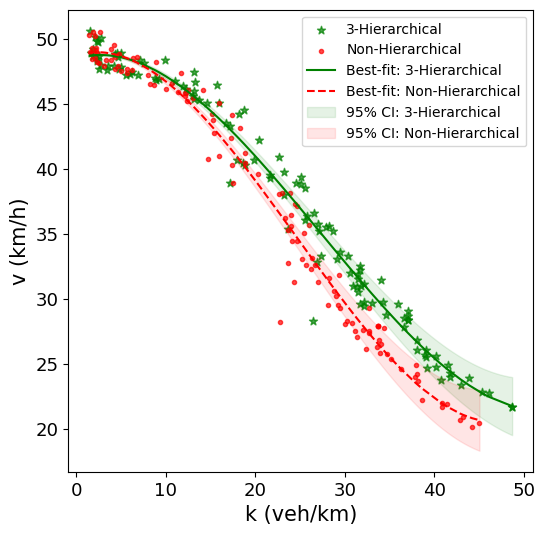

In [76]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Nonlinear function (example uses a quadratic; adjust as needed)
def nonlinear_func(x, a,b, c, d):
    return a * x**3+b*x**2 + c * x + d

# Fit function and compute confidence intervals
def fit_and_compute_ci(x, y):
    # Sort data for proper curve plotting
    sorted_indices = np.argsort(x)
#     sorted_indices=sorted_indices[:-5]
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Fit the nonlinear function
    params, covariance = curve_fit(nonlinear_func, x_sorted, y_sorted)

    # Predict fitted values
    fitted_y = nonlinear_func(x_sorted, *params)

    # Compute confidence interval
    critical_value = 0.1
    confidence_interval = critical_value * np.sqrt(np.diag(covariance))
    lower_bounds = params - confidence_interval
    upper_bounds = params + confidence_interval

    return x_sorted, y_sorted, fitted_y, params, lower_bounds, upper_bounds

# Prepare data arrays
density_1 = here_3['est_den'].values

random_values = np.random.uniform(1, 2, size=here_3.shape[0])
ratio = here_3['est_flow'].values / here_3['est_den'].values
flow_1 = np.where(ratio < 35, ratio + random_values, ratio)



density_2 = athn['est_den'].values
flow_2 = athn['est_flow'].values/athn['est_den'].values



# Fit and compute CI for both datasets
x1_sorted, y1_sorted, y1_fit, params1, lower1, upper1 = fit_and_compute_ci(density_1, flow_1)
x2_sorted, y2_sorted, y2_fit, params2, lower2, upper2 = fit_and_compute_ci(density_2, flow_2)

# Generate smooth density range for plotting confidence bands
x_smooth1 = np.linspace(min(x1_sorted), max(x1_sorted), 500)
x_smooth2 = np.linspace(min(x2_sorted), max(x2_sorted), 500)

# Calculate CI bounds for each dataset
upper_fit_1 = nonlinear_func(x_smooth1, *(params1 + (upper1 - params1)))
lower_fit_1 = nonlinear_func(x_smooth1, *(params1 - (params1 - lower1)))

upper_fit_2 = nonlinear_func(x_smooth2, *(params2 + (upper2 - params2)))
lower_fit_2 = nonlinear_func(x_smooth2, *(params2 - (params2 - lower2)))

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))

# Scatter plots
ax1.scatter(density_1, flow_1, marker='*', c='g', alpha=0.7, label='3-Hierarchical')
ax1.scatter(density_2, flow_2, marker='.', c='red', alpha=0.7, label='Non-Hierarchical')

# Best-fit curves
ax1.plot(x1_sorted, y1_fit, color='green', label='Best-fit: 3-Hierarchical')
ax1.plot(x2_sorted, y2_fit, color='red',linestyle='dashed', label='Best-fit: Non-Hierarchical')

# Confidence intervals
ax1.fill_between(x_smooth1, lower_fit_1, upper_fit_1, color='green', alpha=0.1, label='95% CI: 3-Hierarchical')
ax1.fill_between(x_smooth2, lower_fit_2, upper_fit_2, color='red', alpha=0.1, label='95% CI: Non-Hierarchical')

# Labeling

ax1.set_xlabel('k (veh/km)', fontsize=15)
ax1.set_ylabel('v (km/h)', fontsize=15)
ax1.tick_params(axis='both', labelsize=13)
ax1.legend(fontsize=10)

# Show plot
plt.show()


In [43]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, t

# Perform Welch's t-test (assumes unequal variances)
t_stat, p_value = ttest_ind(flow_1, flow_2, equal_var=False)

# Sample sizes
n1, n2 = len(flow_1), len(flow_2)

# Sample variances
s1_sq, s2_sq = np.var(flow_1, ddof=1), np.var(flow_2, ddof=1)

# Compute degrees of freedom using Welch-Satterthwaite equation
df = ((s1_sq / n1 + s2_sq / n2) ** 2) / \
     (((s1_sq / n1) ** 2) / (n1 - 1) + ((s2_sq / n2) ** 2) / (n2 - 1))

# Compute t-critical value for two-tailed test at 95% confidence (alpha = 0.05)
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df)

# Print results
print("Flow Comparison:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {df:.2f}")
print(f"t-critical (95% confidence): ±{t_critical:.4f}")

# Interpretation
if abs(t_stat) > t_critical:
    print("Result: The difference is statistically significant.")
else:
    print("Result: No significant difference.")


Flow Comparison:
t-statistic: 7.0890
p-value: 0.0000
Degrees of freedom: 123.00
t-critical (95% confidence): ±1.9794
Result: The difference is statistically significant.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define nonlinear function
def nonlinear_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Extract days of the week
days = df_MFD['day_of_week'].to_list()

# Identify weekday and weekend indices
weekend_indices = [i for i, d in enumerate(days) if d in ['Sunday', 'Saturday']]
weekdays_indices = [i for i, d in enumerate(days) if d in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']]

# Check if there are data points for weekdays or weekends
has_weekdays = len(weekdays_indices) > 0
has_weekends = len(weekend_indices) > 0

# Proceed only if data is available
if has_weekdays or has_weekends:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

    # Process weekdays
    if has_weekdays:
        # Filter out zero values
        x_weekdays = np.array([loading[i] for i in weekdays_indices if loading[i] != 0 and loading_flow[i] != 0])
        y_weekdays_flow = np.array([loading_flow[i] for i in weekdays_indices if loading[i] != 0 and loading_flow[i] != 0])
        y_weekdays_spd = np.array([loading_spd[i] for i in weekdays_indices if loading[i] != 0 and loading_spd[i] != 0])

        ax1.scatter(x_weekdays, y_weekdays_flow, c="r", marker='.')
        ax2.scatter(x_weekdays, y_weekdays_spd, c="r", marker='.')

        # Fit nonlinear function to weekday data
        if len(x_weekdays) > 3:  # Ensure enough data points for fitting
            popt_flow, _ = curve_fit(nonlinear_func, x_weekdays, y_weekdays_flow)
            popt_spd, _ = curve_fit(nonlinear_func, x_weekdays, y_weekdays_spd)

            x_fit = np.linspace(min(x_weekdays), max(x_weekdays), 100)
            ax1.plot(x_fit, nonlinear_func(x_fit, *popt_flow), 'r-', label='Best-fit Weekdays (Flow)')
            ax2.plot(x_fit, nonlinear_func(x_fit, *popt_spd), 'r-', label='Best-fit Weekdays (Speed)')

    # Process weekends
    if has_weekends:
        # Filter out zero values
        x_weekends = np.array([loading[j] for j in weekend_indices if loading[j] != 0 and loading_flow[j] != 0])
        y_weekends_flow = np.array([loading_flow[j] for j in weekend_indices if loading[j] != 0 and loading_flow[j] != 0])
        y_weekends_spd = np.array([loading_spd[j] for j in weekend_indices if loading[j] != 0 and loading_spd[j] != 0])

        ax1.scatter(x_weekends, y_weekends_flow, c="b", marker='x')
        ax2.scatter(x_weekends, y_weekends_spd, c="b", marker='x')

        # Fit nonlinear function to weekend data
        if len(x_weekends) > 3:  # Ensure enough data points for fitting
            popt_flow_w, _ = curve_fit(nonlinear_func, x_weekends, y_weekends_flow)
            popt_spd_w, _ = curve_fit(nonlinear_func, x_weekends, y_weekends_spd)

            x_fit = np.linspace(min(x_weekends), max(x_weekends), 100)
            ax1.plot(x_fit, nonlinear_func(x_fit, *popt_flow_w), 'b-', label='Best-fit Weekends (Flow)')
            ax2.plot(x_fit, nonlinear_func(x_fit, *popt_spd_w), 'b-', label='Best-fit Weekends (Speed)')

    # Set axis labels
    ax1.set_ylabel('Flow (veh./Hr.)', fontsize=15)
    ax1.set_xlabel('Density (veh./Km)', fontsize=15)
    ax2.set_ylabel('Speed (km./Hr.)', fontsize=15)
    ax2.set_xlabel('Density (veh./Km)', fontsize=15)

    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=15)

    ax1.legend(fontsize=15)
    ax2.legend(fontsize=15)

    # Set titles
    ax1.set_title("LD-ULD:q-k (Sep-Feb)", fontsize=15)
    ax2.set_title("LD-ULD:v-k (Sep-Feb)", fontsize=15)

    plt.show()
else:
    print("No weekday or weekend data available for plotting.")
